
# Energy Consumption Prediction using a Smaller Subset of the UCI Dataset

In this notebook, we will develop a machine learning model to predict **Global Active Power Consumption** using a smaller subset of the **Individual Household Electric Power Consumption** dataset from the UCI Machine Learning Repository.

### Steps:
1. Load and preprocess the dataset.
2. Create a smaller subset of the dataset with 1000 rows.
3. Train a machine learning model (Random Forest) to predict energy consumption.
4. Evaluate the model and visualize the results.


In [ ]:

# Step 1: Install necessary packages (if not already installed)
!pip install ucimlrepo

# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo


In [ ]:

# Step 2: Fetch the dataset from UCI repository using the ucimlrepo package
individual_household_electric_power_consumption = fetch_ucirepo(id=235)

# Extract features (X)
X = individual_household_electric_power_consumption.data.features


/usr/local/lib/python3.10/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [ ]:

# Step 3: Create a smaller subset of 1000 rows
small_dataset = X.sample(n=1000, random_state=42)

# Save the smaller dataset to a CSV file (for reference or download)
small_dataset.to_csv('small_individual_household_power_consumption.csv', index=False)


In [ ]:

# Step 4: Preprocess the dataset
# Convert 'Date' and 'Time' columns into a single 'DateTime' column
small_dataset['DateTime'] = pd.to_datetime(small_dataset['Date'] + ' ' + small_dataset['Time'], format='%d/%m/%Y %H:%M:%S')
small_dataset['Year'] = small_dataset['DateTime'].dt.year
small_dataset['Month'] = small_dataset['DateTime'].dt.month
small_dataset['Day'] = small_dataset['DateTime'].dt.day
small_dataset['Hour'] = small_dataset['DateTime'].dt.hour

# Drop original 'Date' and 'Time' columns
small_dataset = small_dataset.drop(columns=['Date', 'Time'])

# Handle missing values (drop rows with missing data)
small_dataset = small_dataset.dropna()


In [ ]:

# Step 5: Define the features and target variable
# Extract 'Global_active_power' as the target from the features dataframe
y = small_dataset['Global_active_power']

# Remove the target 'Global_active_power' from the features dataframe
X = small_dataset.drop(columns=['Global_active_power'])

# Use selected features for prediction
features = ['Year', 'Month', 'Day', 'Hour', 'Voltage', 'Global_reactive_power']


In [ ]:

# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[features], y, test_size=0.2, random_state=42)

# Step 7: Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 8: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 9: Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")


Mean Squared Error: 0.7473597715939084
Mean Absolute Error: 0.6041727918781726
Root Mean Squared Error: 0.8644997233047033


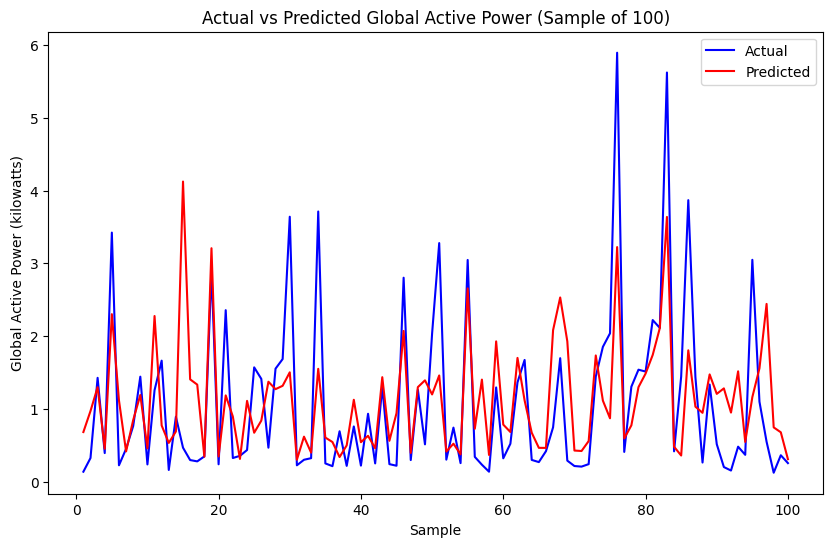

In [ ]:

# Step 10: Visualize the predictions vs actual values
# Ensure both y_test and y_pred contain only numeric values
y_test_numeric = pd.to_numeric(y_test, errors='coerce')
y_pred_numeric = pd.to_numeric(y_pred, errors='coerce')

# Generate a sequence of numbers for the x-axis (sample indices)
x_values = np.arange(1, len(y_test_numeric[:100]) + 1)

# Plot the first 100 values of actual and predicted energy consumption
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_test_numeric[:100], label="Actual", color='b')
plt.plot(x_values, y_pred_numeric[:100], label="Predicted", color='r')
plt.title("Actual vs Predicted Global Active Power (Sample of 100)")
plt.xlabel("Sample")
plt.ylabel("Global Active Power (kilowatts)")
plt.legend()
plt.show()
